## Credit Scoring 

### Install Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

### Read in the data 

In [2]:
sys.path.append("/Users/kkusterer/Documents/MBD Semester 2/Credit scoring/Assignment/Data")

In [3]:
Data = "/Users/kkusterer/Documents/MBD Semester 2/Credit scoring/Assignment/Data"

In [4]:
Accepts_data = pd.read_excel(Data + "/ACCEPTS.xlsx")

In [5]:
Rejects_data = pd.read_excel(Data + "/REJECTS.xlsx")

## Intial appraoch 

On the intial approach I will deal with each of the data sets seperately, picking a vaiable within each of them to compare. This variable will be FICO_score because at first sight I believe it to play a siginficant impact on Default_45.

### Accept Data Set

In [6]:
Accepts_data.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45
0,250263,1,1,11,5,6,7,1,2,0,1,0,NaN,1.438518,-0.259085,1.781040,0.860269,0.513980,0
1,250290,1,2,6,4,5,1,1,2,1,1,0,1.498183,0.204811,0.383312,1.107163,-0.718249,1.796590,0
2,250249,2,3,11,5,7,7,1,2,1,1,0,-0.241731,-0.852651,-0.732430,1.406664,1.122930,-0.768631,0
3,249516,3,3,10,4,2,4,1,2,0,1,168,NaN,-0.676407,-0.057350,0.957412,-1.702482,0.513980,1
4,249827,1,3,5,2,4,4,1,3,0,1,0,NaN,-0.412042,-0.574648,-0.390342,0.910077,-0.768631,0


In [7]:
Accepts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   V1                   10000 non-null  int64  
 2   V2                   10000 non-null  int64  
 3   V3                   10000 non-null  int64  
 4   V4                   10000 non-null  int64  
 5   V5                   10000 non-null  int64  
 6   V6                   10000 non-null  int64  
 7   V7                   10000 non-null  int64  
 8   V8                   10000 non-null  object 
 9   Has_FICO             10000 non-null  int64  
 10  Business_channel     10000 non-null  int64  
 11  Days_late            10000 non-null  int64  
 12  FICO_Score           5528 non-null   float64
 13  Loan_amount          10000 non-null  float64
 14  Monthly_income       10000 non-null  float64
 15  Age                  10000 non-null  

In [8]:
# Check NA's

Accepts_data['FICO_Score'].isna().sum()

4472

In [9]:
# Create a FICO Score object on which to plot 
FICO_Score_Acpt = Accepts_data['FICO_Score'].isna()

### Plot of FICO Score holders: 

#### True indicates that the ID had no related FICO score, while False indicates that the ID did have a associated FICO score.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


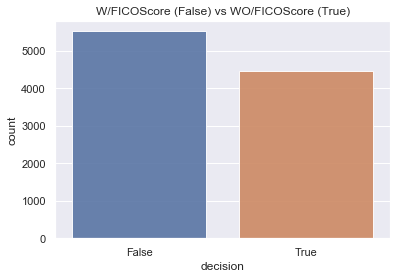

In [10]:
#Packages for graph
%matplotlib inline
import seaborn as sns
# Base graoh on:

FICO_Score_counts = FICO_Score_Acpt.value_counts()

# Style of graph
sns.set(style="darkgrid")
sns.barplot(FICO_Score_counts.index, FICO_Score_counts.values, alpha=0.9)

# Customize graph
plt.title('W/FICOScore (False) vs WO/FICOScore (True)')
plt.ylabel('count', fontsize=12)
plt.xlabel('decision', fontsize=12)
plt.show()


### Disturbution of FICO scores: For accepted cases

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:404: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


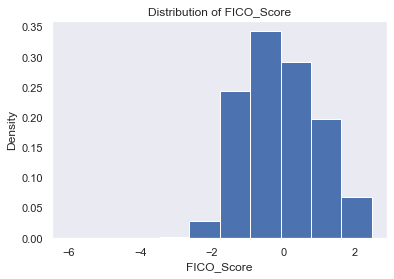

In [11]:
Accepts_data.hist(column="FICO_Score", grid=False, normed=True)

plt.title("Distribution of FICO_Score")

plt.xlabel("FICO_Score")
plt.ylabel("Density")

plt.show()

In [12]:
Accepts_data['FICO_Score'].max()

2.46756282203773

### Dealing with Missing Values 

#### FICO Score: In this case we want to replace our missing values with a number which is clearly not possible. 
#### So based on the fact that the values in this column have been normalized, I have chosen to replace missing values with 
#### 0 as this value is clearly impossible. 

In [13]:
Accepts_data["FICO_Score"].fillna(value = 0, inplace=True)

In [14]:
Accepts_data.isna().sum()

ID                     0
V1                     0
V2                     0
V3                     0
V4                     0
V5                     0
V6                     0
V7                     0
V8                     0
Has_FICO               0
Business_channel       0
Days_late              0
FICO_Score             0
Loan_amount            0
Monthly_income         0
Age                    0
Gearing_coefficient    0
Max_gearing_ratio      0
Default_45             0
dtype: int64

In [15]:
Accepts_data.head(20)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45
0,250263,1,1,11,5,6,7,1,2,0,1,0,0.000000,1.438518,-0.259085,1.781040,0.860269,0.513980,0
1,250290,1,2,6,4,5,1,1,2,1,1,0,1.498183,0.204811,0.383312,1.107163,-0.718249,1.796590,0
2,250249,2,3,11,5,7,7,1,2,1,1,0,-0.241731,-0.852651,-0.732430,1.406664,1.122930,-0.768631,0
3,249516,3,3,10,4,2,4,1,2,0,1,168,0.000000,-0.676407,-0.057350,0.957412,-1.702482,0.513980,1
4,249827,1,3,5,2,4,4,1,3,0,1,0,0.000000,-0.412042,-0.574648,-0.390342,0.910077,-0.768631,0
5,250329,1,3,11,2,5,4,3,4,0,2,0,0.000000,0.557299,-0.210623,-0.390342,-0.384496,0.513980,0
6,250196,2,4,11,5,7,7,3,1,1,1,0,0.590942,-0.852651,-0.674952,1.256913,-0.789555,-0.768631,0
7,250358,1,3,12,3,3,5,1,3,0,2,0,0.000000,-0.464915,-0.580283,-0.465218,0.503527,-0.768631,0
8,250375,2,5,11,5,1,7,1,1,0,1,336,0.000000,0.028568,-0.709889,1.406664,1.062267,-0.768631,1
9,250415,3,3,14,1,4,4,3,1,0,1,0,0.000000,-0.235798,-0.766240,-0.315467,1.023953,-0.768631,0


## Reject Dataset 

In [16]:
Rejects_data.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
0,305932,3,3,14,2,1,5,1,1,1,1,-0.030455,-0.323920,-0.605449,-1.064220,1.028210,-0.768631
1,305764,1,4,7,1,6,4,1,2,1,1,0.715222,5.668368,1.299572,0.807662,1.081778,1.796590
2,305971,1,4,10,4,5,4,1,4,1,3,0.764933,-0.750782,0.434027,-0.390342,-0.969416,1.796590
3,305664,1,5,14,2,2,5,3,3,1,1,-1.347818,-0.852651,-0.490122,-0.989344,1.046303,-0.768631
4,305639,1,4,15,1,5,4,1,3,1,2,1.634890,3.200955,0.561380,0.583036,0.088464,1.796590


In [17]:
Rejects_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   V1                   5000 non-null   int64  
 2   V2                   5000 non-null   int64  
 3   V3                   5000 non-null   int64  
 4   V4                   5000 non-null   int64  
 5   V5                   5000 non-null   int64  
 6   V6                   5000 non-null   int64  
 7   V7                   5000 non-null   int64  
 8   V8                   5000 non-null   object 
 9   Has_FICO             5000 non-null   int64  
 10  Business_channel     5000 non-null   int64  
 11  FICO_Score           2914 non-null   float64
 12  Loan_amount          5000 non-null   float64
 13  Monthly_income       5000 non-null   float64
 14  Age                  5000 non-null   float64
 15  Gearing_coefficient  5000 non-null   f

In [18]:
# Check NA's

Rejects_data['FICO_Score'].isna().sum()

2086

In [19]:
# Create a FICO Score object on which to plot 
FICO_Score_Rej = Rejects_data['FICO_Score'].isna()

### Plot Fico Score holders:

#### True indicates that the ID had no related FICO score, while False indicates that the ID did have a associated FICO score.

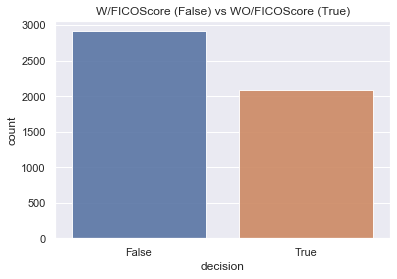

In [20]:
#Packages for graph
%matplotlib inline
import seaborn as sns
# Base graoh on:

FICO_Score_counts = FICO_Score_Rej.value_counts()

# Style of graph
sns.set(style="darkgrid")
sns.barplot(FICO_Score_counts.index, FICO_Score_counts.values, alpha=0.9)

# Customize graph
plt.title('W/FICOScore (False) vs WO/FICOScore (True)')
plt.ylabel('count', fontsize=12)
plt.xlabel('decision', fontsize=12)
plt.show()


### Disturbution of FICO scores : For rejected cases

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:404: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


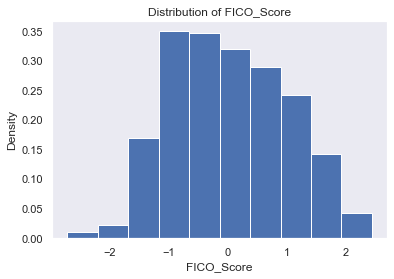

In [21]:
Rejects_data.hist(column="FICO_Score", grid=False, normed=True)

plt.title("Distribution of FICO_Score")

plt.xlabel("FICO_Score")
plt.ylabel("Density")

plt.show()

In [22]:
Rejects_data['FICO_Score'].max()

2.4427069187241957

### We plot all the variables 

This way allowing us to see to see the disturbution of each variable, after we chose to do a closer inspection on FICO_Score to see if this variable held any insights. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002022984F748>,
      dtype=object)

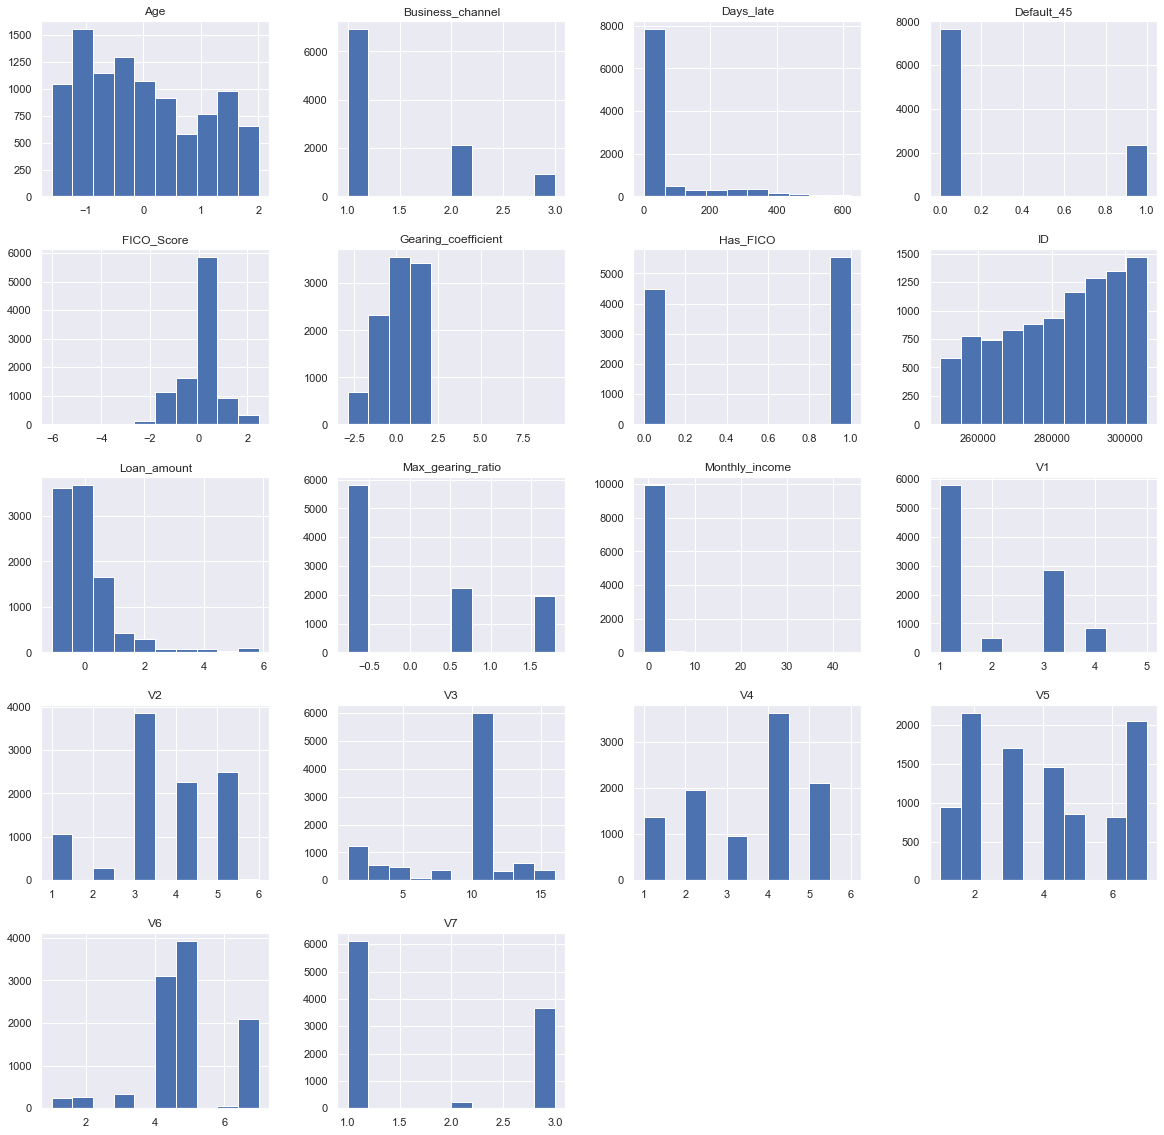

In [23]:
Accepts_data.hist(figsize=(20, 20))

### Dealing with Missing Values 

We chose to fill the missing values with 0, this due to the fact that a missing value in this instance would indicate that each an individual did not in fact have a FICO_Score. Also further reserach revelies that the a credit score of 0 is also impossible. 

In [24]:
Rejects_data["FICO_Score"].fillna(value = 0, inplace=True)

In [25]:
Rejects_data.head(20)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
0,305932,3,3,14,2,1,5,1,1,1,1,-0.030455,-0.323920,-0.605449,-1.064220,1.028210,-0.768631
1,305764,1,4,7,1,6,4,1,2,1,1,0.715222,5.668368,1.299572,0.807662,1.081778,1.796590
2,305971,1,4,10,4,5,4,1,4,1,3,0.764933,-0.750782,0.434027,-0.390342,-0.969416,1.796590
3,305664,1,5,14,2,2,5,3,3,1,1,-1.347818,-0.852651,-0.490122,-0.989344,1.046303,-0.768631
4,305639,1,4,15,1,5,4,1,3,1,2,1.634890,3.200955,0.561380,0.583036,0.088464,1.796590
5,305854,3,3,10,1,4,5,3,1,1,1,0.976209,0.292933,-0.505900,0.058909,1.021825,-0.768631
6,306018,1,5,10,4,2,4,3,>4,1,1,-0.453006,-0.323920,0.320199,-1.213970,-1.177302,1.796590
7,305910,1,3,10,4,3,4,3,3,1,1,-0.179591,0.557299,0.159037,-1.139095,-0.244013,0.513980
8,305802,1,4,2,2,6,4,1,2,0,1,0.000000,-0.852651,-0.620855,0.732786,-0.053083,-0.768631
9,306025,1,3,10,4,5,4,1,2,1,3,1.237196,-0.773694,-0.084398,0.358410,-1.022203,0.513980


### Spread the V8 column 

We chose to spread this column as there is a value of >4, and we cannot be sure much greater than 4 this value is and thus the decision to dummy encode. 

In [26]:
Accepts_data = pd.get_dummies(Accepts_data, columns = ["V8"], prefix="V8")


In [27]:
Rejects_data = pd.get_dummies(Rejects_data, columns = ["V8"], prefix="V8") # Here we do the same for rejects 

In [28]:
Accepts_data.head()

,ID,V1,V2,V3,V4,V5,V6,V7,Has_FICO,Business_channel,...,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45,V8_1,V8_2,V8_3,V8_4,V8_>4
0,250263,1,1,11,5,6,7,1,0,1,...,-0.259085,1.781040,0.860269,0.513980,0,0,1,0,0,0
1,250290,1,2,6,4,5,1,1,1,1,...,0.383312,1.107163,-0.718249,1.796590,0,0,1,0,0,0
2,250249,2,3,11,5,7,7,1,1,1,...,-0.732430,1.406664,1.122930,-0.768631,0,0,1,0,0,0
3,249516,3,3,10,4,2,4,1,0,1,...,-0.057350,0.957412,-1.702482,0.513980,1,0,1,0,0,0
4,249827,1,3,5,2,4,4,1,0,1,...,-0.574648,-0.390342,0.910077,-0.768631,0,0,0,1,0,0


## WOE and IV 

The weight of evidence can be defined as the logaritham of the proportion of goods in a catergory divied by the proportion of bads in the same catergory. 

Thus below we have included a function to calculate the WOE manually, here you can compares variables and there predictive value  with the target.

### Function for IV calculation 
### From : https://www.kaggle.com/puremath86/iv-woe-starter-for-python#Calculate-Information-Value

In [29]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

### Apply the function to the FICO Score column


In [30]:
# Categorize variable in 10 bins based on distribution
Accepts_data["FICO_Score"] = pd.qcut(Accepts_data["FICO_Score"].rank(method = 'first'), q=10, labels=False)

# Run calc_IV function from 
iv, FICO_Score_IV = calc_iv(Accepts_data, "FICO_Score", "Default_45")

In [31]:
iv

0.6685322406932765

In [32]:
FICO_Score_IV

,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,FICO_Score,0,1000,479,521,0.1,0.521,0.062729,0.220389,-1.256568,0.198111
1,FICO_Score,1,1000,654,346,0.1,0.346,0.085647,0.146362,-0.535850,0.032534
2,FICO_Score,2,1000,817,183,0.1,0.183,0.106993,0.077411,0.323634,0.009574
3,FICO_Score,3,1000,732,268,0.1,0.268,0.095862,0.113367,-0.167725,0.002936
4,FICO_Score,4,1000,774,226,0.1,0.226,0.101362,0.095601,0.058518,0.000337
5,FICO_Score,5,1000,711,289,0.1,0.289,0.093112,0.122250,-0.272273,0.007934
6,FICO_Score,6,1000,747,253,0.1,0.253,0.097826,0.107022,-0.089843,0.000826
7,FICO_Score,7,1000,815,185,0.1,0.185,0.106731,0.078257,0.310313,0.008836
8,FICO_Score,8,1000,938,62,0.1,0.062,0.122839,0.026227,1.544097,0.149179
9,FICO_Score,9,1000,969,31,0.1,0.031,0.126899,0.013113,2.269759,0.258266


### Transform the full data set to WOE values

Below we will use a function to transfomr the entire data set to WOE values to use in our models.


In [33]:
!pip install category_encoders
from category_encoders import *

In [34]:
col=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8_1','V8_2','V8_3','V8_4','V8_>4', 'Has_FICO',
       'Business_channel', 'FICO_Score', 'Loan_amount',
       'Monthly_income', 'Age', 'Gearing_coefficient', 'Max_gearing_ratio']
woe_map = WOEEncoder(cols=col).fit(Accepts_data, Accepts_data['Default_45'])
Accepts_data = woe_map.transform(Accepts_data)
Accepts_data[col].head()

,V1,V2,V3,V4,V5,V6,V7,V8_1,V8_2,V8_3,V8_4,V8_>4,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
0,-0.327291,-0.490511,-0.350069,-0.802899,-0.793778,-0.850288,-0.276501,-0.234122,-0.298630,0.036024,0.006404,-0.00366,0.114036,-0.176639,0.169501,0.232387,0.073323,-0.507707,1.171935,0.122455
1,-0.327291,-0.569328,0.216424,0.274347,-0.404533,-0.502041,-0.276501,-0.234122,-0.298630,0.036024,0.006404,-0.00366,-0.097529,-0.176639,-2.239625,-0.011648,0.073323,-1.452734,0.000000,-0.037825
2,-0.381413,0.104951,-0.350069,-0.802899,-0.809482,-0.850288,-0.276501,-0.234122,-0.298630,0.036024,0.006404,-0.00366,-0.097529,-0.176639,-0.319992,-0.057517,0.073323,-0.311734,0.478788,-0.036298
3,0.564363,0.104951,0.339189,0.274347,0.613594,-0.038347,-0.276501,-0.234122,-0.298630,0.036024,0.006404,-0.00366,0.114036,-0.176639,0.169501,0.013031,2.088226,-0.455521,0.000000,0.122455
4,-0.327291,0.104951,-1.021313,0.130713,-0.313869,-0.038347,-0.276501,-0.234122,0.160883,-0.221093,0.006404,-0.00366,0.114036,-0.176639,0.169501,-0.038469,0.835463,0.177683,-0.773975,-0.036298


### Feature Selection Method

We have devcided to use a feature slection method of Pearson correlation, this shows us the variables with the strongest effector on our target variable, thus we can selct these variables and leave out those variables wich are negatively correlated. This in an attempt to imporve the performance of our model. 

In [35]:
Accepts_data.corr(method='pearson')

,ID,V1,V2,V3,V4,V5,V6,V7,Has_FICO,Business_channel,...,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45,V8_1,V8_2,V8_3,V8_4,V8_>4
ID,1.000000,0.075457,0.063091,0.063145,0.056175,0.150363,0.111999,0.128995,0.069401,-0.121547,...,-0.006528,0.070983,-0.019447,0.011816,-0.039151,0.037052,0.064573,-0.026606,-0.003419,0.022571
V1,0.075457,1.000000,0.067840,0.192355,0.236364,0.343297,0.255371,0.438041,0.167791,0.036186,...,0.071579,0.462368,0.067985,0.025130,0.178787,0.743622,0.431991,0.233351,0.199628,-0.083079
V2,0.063091,0.067840,1.000000,0.192682,0.022756,0.129247,0.272257,0.075867,0.154894,0.004231,...,0.023173,0.086532,0.031025,0.015829,0.117069,0.057530,0.049314,0.023506,0.001082,0.035922
V3,0.063145,0.192355,0.192682,1.000000,0.393701,0.381701,0.464344,0.214728,0.119268,0.040455,...,0.047308,0.345612,0.060473,0.072522,0.155639,0.079127,0.151978,-0.047620,-0.054625,0.025459
V4,0.056175,0.236364,0.022756,0.393701,1.000000,0.569626,0.724724,0.305034,0.025007,0.042112,...,0.079296,0.570272,0.055491,0.139228,0.150446,0.024897,0.258759,-0.183136,-0.142623,0.065437
V5,0.150363,0.343297,0.129247,0.381701,0.569626,1.000000,0.616004,0.371151,0.286199,0.075293,...,0.075337,0.549821,0.108861,0.062614,0.237894,0.160932,0.241806,-0.056459,-0.052893,0.035983
V6,0.111999,0.255371,0.272257,0.464344,0.724724,0.616004,1.000000,0.321695,0.183184,0.018956,...,0.073957,0.534820,0.068485,0.076552,0.192625,0.051501,0.245008,-0.145872,-0.116195,0.073489
V7,0.128995,0.438041,0.075867,0.214728,0.305034,0.371151,0.321695,1.000000,0.152809,-0.031719,...,0.041663,0.493464,0.056775,0.034474,0.137176,0.292233,0.302714,-0.025160,0.005726,-0.012262
Has_FICO,0.069401,0.167791,0.154894,0.119268,0.025007,0.286199,0.183184,0.152809,1.000000,-0.037608,...,-0.027828,0.154272,0.015890,-0.085553,0.044885,0.121627,0.081081,0.032535,0.027916,-0.000587
Business_channel,-0.121547,0.036186,0.004231,0.040455,0.042112,0.075293,0.018956,-0.031719,-0.037608,1.000000,...,0.082039,0.047511,0.093288,-0.008372,0.212055,0.039009,-0.041510,0.054972,0.060070,-0.020485


The below features were selected based on their score with the target

In [36]:
Selected_feature = ["V1","V2","V3","V4","V5","V6","V7","V8_1","V8_2","V8_4",
                    "Business_channel","Monthly_income","Age","Gearing_coefficient"]

### Logistic Regression 

Now we will run the model on the data. We will spilt into train and test. We will do this the time round wih specialised feature selection technique.

We will need the below libaries to run this logistic regression 

Why we have decided to use a logistic regression, this is in a paper by Ali Al-Aradi from the Department of Statistical Sciences, University of Toronto, Toronto, Canada titled Credit Scoring via Logistic Regression. In this paper it states, "Logistic regression is one of the most important models for categorical response data. It
is an example of a generalized linear model whose main use is to estimate the probability
that a binary response occurs based on a number of predictor variables." 

Given that we are predicting a binary response IE Default or not Default, Logistic Regression a suitable type of model for this task. 

In [37]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

#### Below we have the logistic Regression setup.

In [38]:
#Creating the logistic Regression
# Remove target/highly/uninformative variables for dataset
x_Accept = Accepts_data.drop(columns=["Default_45","ID","Days_late"])
select = x_Accept.columns.values
y_Accept = Accepts_data["Default_45"]
################################################################################################################################
#Split the data
x_Accept_tr,x_Accept_te,y_Accept_tr,y_Accept_te = train_test_split(x_Accept,y_Accept,test_size =.33,random_state=1)
logreg_basic = LogisticRegression()

#Train the model
logreg_basic.fit(x_Accept_tr,y_Accept_tr)

#Print the coefficients
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

# Predict out come on test
y_Accept_pre = logreg_basic.predict(x_Accept_te)

# creating the metrics
a1 = accuracy_score(y_Accept_te,y_Accept_pre)
f1 = f1_score(y_Accept_te, y_Accept_pre, average="macro")
p1 = precision_score(y_Accept_te, y_Accept_pre, average="macro")
r1 = recall_score(y_Accept_te, y_Accept_pre, average="macro")

# veiw the performance
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

intercept 
[-2.46683807]

coefficients 
[[ 7.82258022e-02  8.91939765e-01  3.31841979e-01 -4.17396254e-01
   5.28601079e-01  1.34316236e-01  8.87677956e-05 -6.61470264e-01
   8.26558374e-01  7.15319512e-01  7.16048047e-01  1.59320464e+00
   4.37395803e-01  1.71843953e+00 -1.67294848e+00  2.70350222e-01
  -1.56708604e-02  8.07219797e-01 -1.75129096e-02  4.56482914e-01]]
accuracy score :  0.8406060606060606
f1 score :  0.754004826369186
precision score :  0.7835784672323489
recall score :  0.7350316813905984


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The logistic Regression, achievse a fairly high score of 0.84 for accuracy.

### Best feature selected  

Below we run a logistic regression, using our selected features for the pearson correlation. 

In [39]:
# Run the logistc model based on selected features of VI 
x = Accepts_data[Selected_feature]
y = Accepts_data["Default_45"]

#training 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state=1)
#fitting
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

#Preciting
y_predict = logreg.predict(x_test)

#metrics
a3 = accuracy_score(y_test,y_predict)
f3 = f1_score(y_test, y_predict, average="macro")
p3 = precision_score(y_test, y_predict, average="macro")
r3 = recall_score(y_test, y_predict, average="macro")

#Print Metrics
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)

accuracy score :  0.8275757575757576
f1 score :  0.7285757010999355
precision score :  0.764006233782672
recall score :  0.7084180122041661


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In this case our accurcay is not quite as high thus the feature selection has seemingly cost us some accuracy

### Decision Trees  

The next model we will run is the Random forrest, With the decsiosn tree classifier. 

We use a decison tree here as having conduct reserach, I can across the paper 'Credit scoring with boosted decision trees' by Jo˜ao A. Bastos from CEMAPRE, School of Economics and Management (ISEG)
Technical University of Lisbon, Portugal where they have proven that the decision tree is an effective means of credit scoring modeling. I will use this quite from the paper to further back this up, "The results show that boosted decision trees are a competitive technique for implementing credit scoring models."

In [40]:
# Packages for Decison tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [41]:
# Creating the decision tree classifier

dectree_basic = DecisionTreeClassifier()
dectree_basic.max_depth = 200

# Training the dcision tree
dectree_basic.fit(x_Accept_tr,y_Accept_tr)

#Predicting the output
y_Accept_pre = dectree_basic.predict(x_Accept_te)

# Creating the decison metrics
a2 = accuracy_score(y_Accept_te,y_Accept_pre)
f2 = f1_score(y_Accept_te, y_Accept_pre, average="macro")
p2 = precision_score(y_Accept_te, y_Accept_pre, average="macro")
r2 = recall_score(y_Accept_te, y_Accept_pre, average="macro")

# Veiw the performance
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

accuracy score :  0.7781818181818182
f1 score :  0.6902852975522845
precision score :  0.6876683431669929
recall score :  0.6931628046162452


### Best feature select applied feature set 

Now we run a the model again with the best feature selection to see if this will imporve the accuracy score of the model.

In [42]:
# Run the Decision Tree model based on selected features of VI 

Accept_tree=DecisionTreeClassifier()
Accept_tree.max_depth = 200

Accept_tree.fit(x_train,y_train)
y_predict = Accept_tree.predict(x_test)

a4 = accuracy_score(y_test,y_predict)
f4 = f1_score(y_test, y_predict, average="macro")
p4 = precision_score(y_test, y_predict, average="macro")
r4 = recall_score(y_test, y_predict, average="macro")


print("accuracy score : ",a4)
print("f1 score : ",f4)
print("precision score : ",p4)
print("recall score : ",r4)

accuracy score :  0.7721212121212121
f1 score :  0.6843711843711844
precision score :  0.6805909956559081
recall score :  0.6887677435303607


Evidently the best feature selection has not helped the models accuracy

## DataFrame of the resluts 

In [43]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree'],
    'Feature Selection Method' : ['None','None','Pearson corr_fact','Pearson corr_fact',],
    'Accuracy Score': [a1,a2,a3,a4],
    'Recall Score' : [r1,r2,r3,r4],
    'F1 Score' : [f1,f2,f3,f4],
    'Precision Score' : [p1,p2,p3,p4]
})

Below we have a summary of all the models run and those using the pearson correaltion

In [44]:
models

,Model,Feature Selection Method,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Logistic Regression,None,0.840606,0.735032,0.754005,0.783578
1,Decision Tree,None,0.778182,0.693163,0.690285,0.687668
2,Logistic Regression,Pearson corr_fact,0.827576,0.708418,0.728576,0.764006
3,Decision Tree,Pearson corr_fact,0.772121,0.688768,0.684371,0.680591


### Reject Inference Method

Reject inference is a method for improving the quality of a credit scorecard by incorporating data from rejected loan applications. Bias can result if a credit scorecard model is built only on accepts and does not account for applications rejected because of past denials for credit or unknown nondefault status. By using the reject inference method, you can infer the performance of rejects and include them in your credit scorecard model to remedy this bias.

Below we run the best performing model thus, the model that acheived the best score on our reject database, we apply "select " data set to our reject dataset. The select dataset is based on Accept_data post WOE covnersion. 

In [45]:
pred = logreg_basic.predict(Rejects_data[select])

Insert the the 2 following columns, to the reject table to match the lenght of Accept

In [46]:
Rejects_data['Default_45'] = pred
Rejects_data['Days_late'] = 0

Merge the 2 data sets together 

In [47]:
Complete = pd.concat([Accepts_data, Rejects_data])
Complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   15000 non-null  int64  
 1   V1                   15000 non-null  float64
 2   V2                   15000 non-null  float64
 3   V3                   15000 non-null  float64
 4   V4                   15000 non-null  float64
 5   V5                   15000 non-null  float64
 6   V6                   15000 non-null  float64
 7   V7                   15000 non-null  float64
 8   Has_FICO             15000 non-null  float64
 9   Business_channel     15000 non-null  float64
 10  Days_late            15000 non-null  int64  
 11  FICO_Score           15000 non-null  float64
 12  Loan_amount          15000 non-null  float64
 13  Monthly_income       15000 non-null  float64
 14  Age                  15000 non-null  float64
 15  Gearing_coefficient  15000 non-null  

## WOE encode 

This time we will WOE Encode our full data set for use in the next modeling step and ultimately towards producing of socres per a customer

In [51]:
col=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8_1','V8_2','V8_3','V8_4','V8_>4','Has_FICO',
       'Business_channel', 'Days_late', 'FICO_Score', 'Loan_amount',
       'Monthly_income', 'Age', 'Gearing_coefficient', 'Max_gearing_ratio']
woe_map = WOEEncoder(cols=col).fit(Complete, Complete['Default_45'])
Complete = woe_map.transform(Complete)
Complete[col].head()

,V1,V2,V3,V4,V5,V6,V7,V8_1,V8_2,V8_3,...,V8_>4,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
0,-1.368140,-1.531360,-1.390918,-1.843749,-1.834627,-1.891137,-1.317351,-1.274972,-1.339480,-1.004825,...,-1.044509,-0.926813,-1.217488,-0.248506,-0.871349,-0.808462,-2.101354,-1.548556,0.131086,-0.918394
1,-1.368140,-1.610177,-0.824426,-0.766502,-1.445382,-1.542891,-1.317351,-1.274972,-1.339480,-1.004825,...,-1.044509,-1.138378,-1.217488,-0.248506,-3.280474,-1.052497,-2.101354,-2.493583,-1.098941,-1.078674
2,-1.422263,-0.935898,-1.390918,-1.843749,-1.850331,-1.891137,-1.317351,-1.274972,-1.339480,-1.004825,...,-1.044509,-1.138378,-1.217488,-0.248506,-1.360841,-1.098366,-2.101354,-1.352583,-0.636169,-1.077148
3,-0.476486,-0.935898,-0.701660,-0.766502,-0.427255,-1.079196,-1.317351,-1.274972,-1.339480,-1.004825,...,-1.044509,-0.926813,-1.217488,5.079846,-0.871349,-1.027819,1.439419,-1.496371,-1.098941,-0.918394
4,-1.368140,-0.935898,-2.062163,-0.910136,-1.354719,-1.079196,-1.317351,-1.274972,-0.879967,-1.261943,...,-1.044509,-0.926813,-1.217488,-0.248506,-0.871349,-1.079318,-0.258379,-0.863166,-3.820158,-1.077148


## Train the model again 

This we train the model on Complete data set which is the combination of reject and accept. This is the first step towards getting the credit for scores for each individual

In [53]:
#Creating the logistic Regression
# Remove target/highly/uninformative variables for dataset
x_Complete = Complete.drop(columns=["ID","Default_45","Days_late"])
Complete_selected = x_Complete.columns.values
y_Complete = Complete["Default_45"]
################################################################################################################################
#Split the data
X_train, X_test, y_train, y_test = train_test_split(x_Complete,y_Complete, test_size=.33, random_state=1)
logreg_basic = LogisticRegression()

#Train the model
logreg_basic.fit(X_train,y_train)

#Print the coefficients
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

# Predict out come on test
y_Accept_pre = logreg_basic.predict(x_Accept_te)

# creating the metrics
a1 = accuracy_score(y_Accept_te,y_Accept_pre)
f1 = f1_score(y_Accept_te, y_Accept_pre, average="macro")
p1 = precision_score(y_Accept_te, y_Accept_pre, average="macro")
r1 = recall_score(y_Accept_te, y_Accept_pre, average="macro")

# veiw the performance
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

intercept 
[-0.01485921]

coefficients 
[[-0.06509516  0.92764222  0.5386408  -0.22989207  0.63004316 -0.1564848
   0.029102   -1.33082284  0.64800444  0.73498172  0.59156768  1.01102208
   0.34736171  1.04685117  0.30733444  0.5176885  -0.26366263  0.43934752
  -1.40119525 -3.03990486]]
accuracy score :  0.6475757575757576
f1 score :  0.6284344688192922
precision score :  0.6729278716296261
recall score :  0.7430997020518091


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Veiw the coefficients of the model


#### We set these to a dataframe, for use later on 

In [54]:
coefficients = pd.concat([pd.DataFrame(Accepts_data[Complete_selected].columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients.columns = ['feature','coef']
coefficients

,feature,coef
0,V1,0.123221
1,V2,0.786621
2,V3,0.322061
3,V4,-0.275201
4,V5,0.572922
5,V6,0.158596
6,V7,0.019947
7,Has_FICO,0.504273
8,Business_channel,-0.294814
9,FICO_Score,-0.511334


## Use our features as a index

#### Here can make use of the coefficients we just put to a dataframe

In [55]:
coefficients = coefficients.set_index('feature')

## Scorecard 

#### Here we begin to create our scorecard, by multiplying the  coeffecients by WOE score of each of the variables 

In [56]:
scorecardTrain = X_train[coefficients.index].apply(lambda x: x * coefficients['coef'].T,axis = 1)

In [57]:
scorecardTrain['Default_45'] = y_train

## Creating the logit variable 

#### We create logit by qumming the score for each row of all the transformed predictors

In [58]:
scorecardTrain['logit'] = scorecardTrain[list(scorecardTrain.columns)].sum(axis=1)

## Compute the score 

#### Computing the scorecard by selecting a target

In [82]:
target_score = 900
target_odds = 30
pts_double_odds = 20

factor = pts_double_odds/np.log(2)
offset = target_score - factor * np.log(target_odds)

In [83]:
scorecardTrain['score'] = offset + factor * scorecardTrain['logit']

## Veiw scorecardTrain 

In [84]:
scorecardTrain.head()

,V1,V2,V3,V4,V5,V6,V7,Has_FICO,Business_channel,FICO_Score,...,Gearing_coefficient,Max_gearing_ratio,V8_1,V8_2,V8_3,V8_4,V8_>4,Default_45,logit,score
7576,-0.168583,-1.048492,-0.447960,0.507401,-1.060096,-0.299927,-0.026277,-0.574054,0.647810,1.677419,...,-1.506031,NaN,NaN,NaN,NaN,NaN,NaN,0,-11.552315,468.532851
509,0.263171,1.980618,1.017305,-0.583892,1.004901,0.403853,0.045567,1.370820,-0.758840,-0.922990,...,3.810668,NaN,NaN,NaN,NaN,NaN,NaN,0,11.425658,1131.536989
4253,-0.058713,-1.048492,-0.447960,0.210942,-0.244784,-0.171156,-0.013671,-0.467367,0.081120,0.560845,...,-1.900949,NaN,NaN,NaN,NaN,NaN,NaN,0,-8.004895,570.889754
5150,-0.058713,-0.736197,-0.177517,0.250470,-0.511696,-0.096354,-0.026277,-0.467367,0.358933,0.392250,...,-0.901792,NaN,NaN,NaN,NaN,NaN,NaN,0,-4.346430,676.450736
506,-0.168583,-1.048492,-0.225977,0.210942,-1.051099,-0.171156,-0.026277,-0.574054,0.358933,1.677419,...,-6.816776,NaN,NaN,NaN,NaN,NaN,NaN,0,-11.181661,479.227643


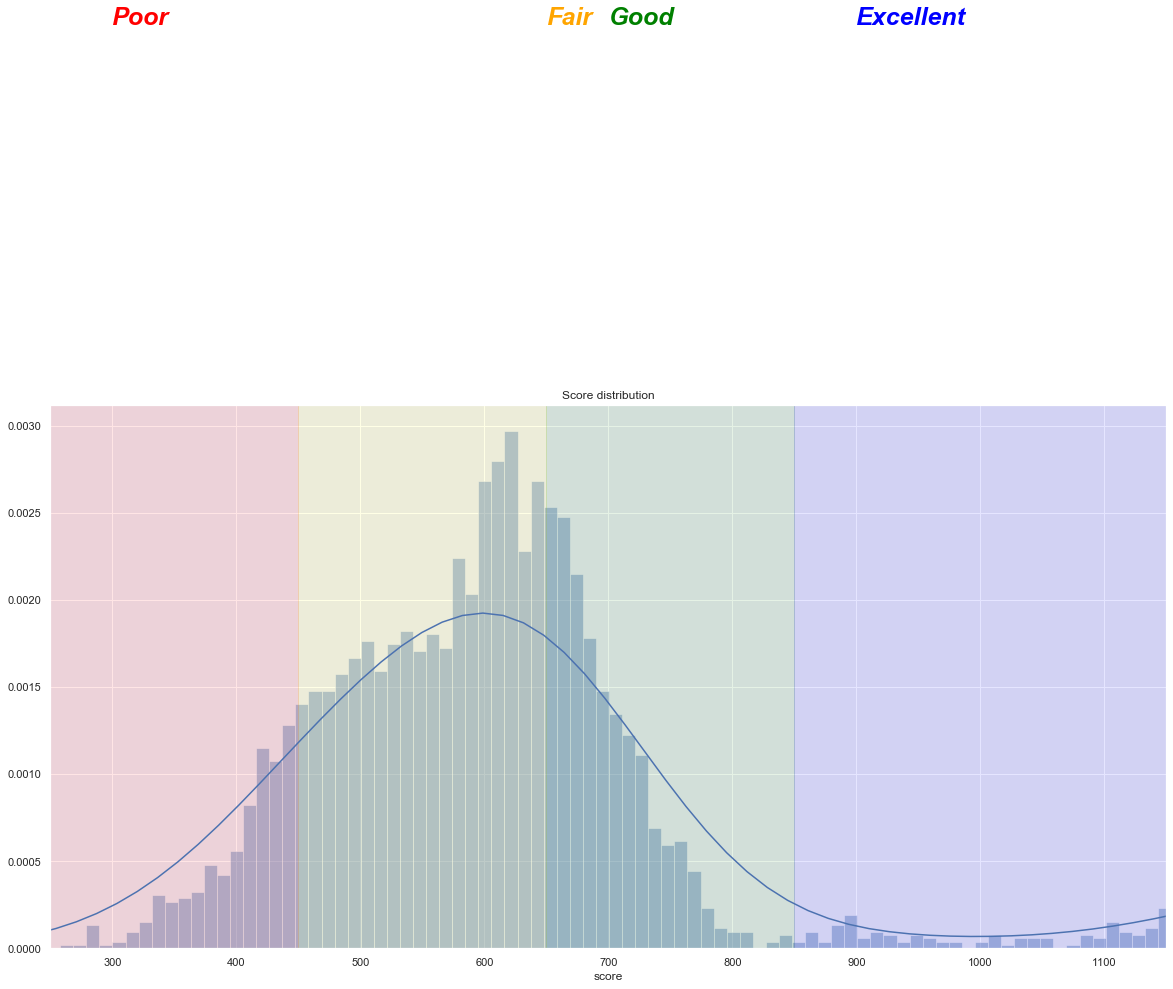

In [88]:
f, axes = plt.subplots(figsize=(20, 10))
plt.xlim(250,1150)
sns.distplot(scorecardTrain['score'], bins = 150)
plt.axvspan(250,450, alpha=0.1, color='red')
plt.axvspan(450, 650, alpha=0.1, color='yellow')
plt.axvspan(650, 850, alpha=0.1, color='green')
plt.axvspan(850, 1150, alpha=0.1, color='blue')
plt.text(300, 0.0053, 'Poor', color='red', fontweight='bold', style='italic', fontsize=25)
plt.text(650, 0.0053, 'Fair', color='orange', fontweight='bold', style='italic', fontsize=25)
plt.text(700, 0.0053, 'Good', color='green', fontweight='bold', style='italic', fontsize=25)
plt.text(900, 0.0053, 'Excellent', color='blue', fontweight='bold', style='italic', fontsize=25)
plt.title('Score distribution')
plt.show()

## Rerun the process again for the test data 

In [69]:
coefficients = pd.concat([pd.DataFrame(X_test[Complete_selected].columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients.columns = ['feature','coef']
coefficients

coefficients = coefficients.set_index('feature')

scorecardTest = X_test[coefficients.index].apply(lambda x: x * coefficients['coef'].T,axis = 1)

scorecardTest['Default_45'] = y_test

scorecardTest['logit'] = scorecardTest[list(scorecardTest.columns)].sum(axis=1)

In [71]:
target_score = 900
target_odds = 30
pts_double_odds = 20

factor = pts_double_odds/np.log(2)
offset = target_score - factor * np.log(target_odds)

In [72]:
scorecardTest['score'] = offset + factor * scorecardTest['logit']

In [73]:
scorecardTest.head()

,V1,V2,V3,V4,V5,V6,V7,Has_FICO,Business_channel,FICO_Score,...,Gearing_coefficient,Max_gearing_ratio,V8_1,V8_2,V8_3,V8_4,V8_>4,Default_45,logit,score
7576,-0.168583,-1.048492,-0.447960,0.507401,-1.060096,-0.299927,-0.026277,-0.574054,0.647810,1.677419,...,-1.506031,NaN,NaN,NaN,NaN,NaN,NaN,0,-11.552315,468.532851
509,0.263171,1.980618,1.017305,-0.583892,1.004901,0.403853,0.045567,1.370820,-0.758840,-0.922990,...,3.810668,NaN,NaN,NaN,NaN,NaN,NaN,0,11.425658,1131.536989
4253,-0.058713,-1.048492,-0.447960,0.210942,-0.244784,-0.171156,-0.013671,-0.467367,0.081120,0.560845,...,-1.900949,NaN,NaN,NaN,NaN,NaN,NaN,0,-8.004895,570.889754
5150,-0.058713,-0.736197,-0.177517,0.250470,-0.511696,-0.096354,-0.026277,-0.467367,0.358933,0.392250,...,-0.901792,NaN,NaN,NaN,NaN,NaN,NaN,0,-4.346430,676.450736
506,-0.168583,-1.048492,-0.225977,0.210942,-1.051099,-0.171156,-0.026277,-0.574054,0.358933,1.677419,...,-6.816776,NaN,NaN,NaN,NaN,NaN,NaN,0,-11.181661,479.227643


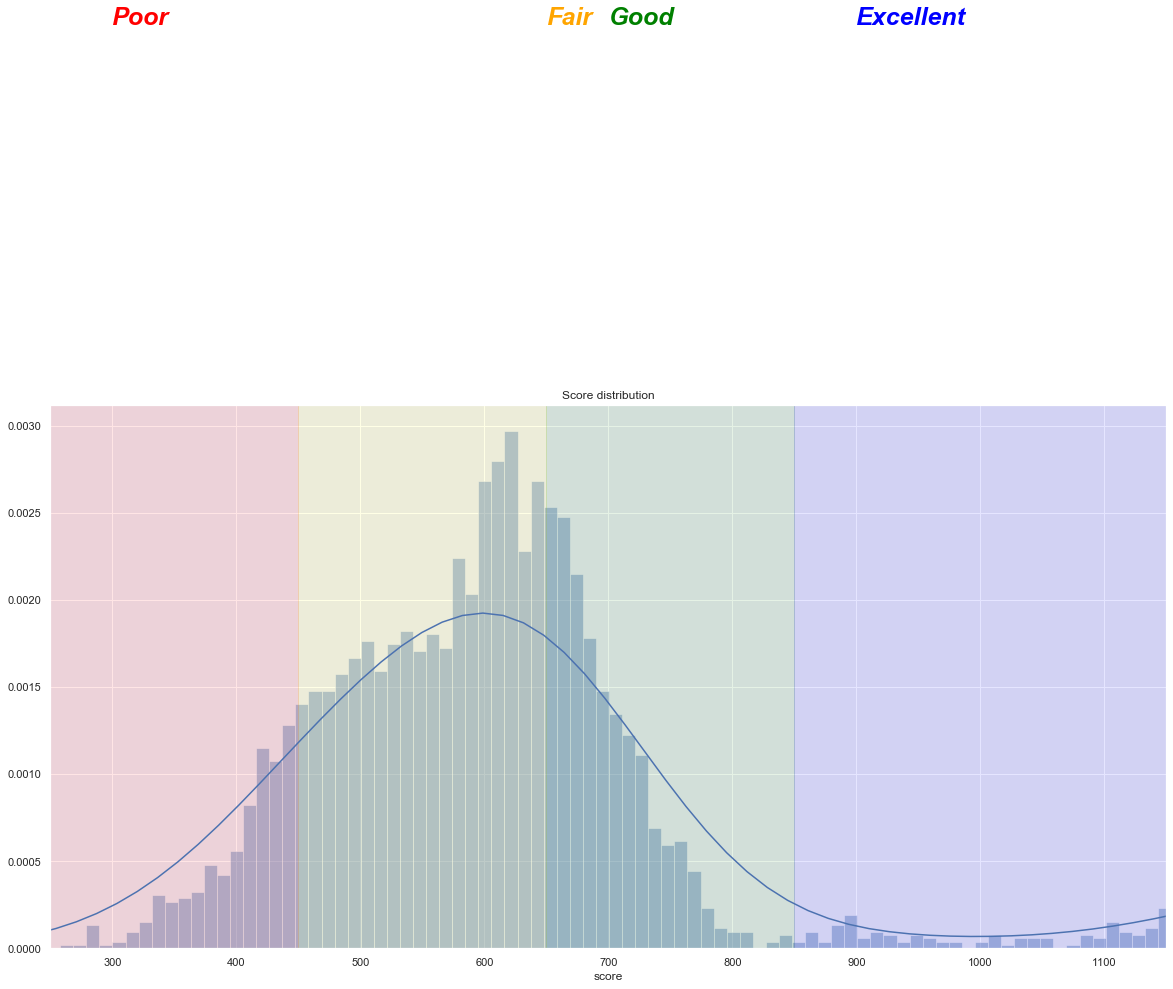

In [89]:
f, axes = plt.subplots(figsize=(20, 10))
plt.xlim(250,1150)
sns.distplot(scorecardTest['score'], bins = 150)
plt.axvspan(250,450, alpha=0.1, color='red')
plt.axvspan(450, 650, alpha=0.1, color='yellow')
plt.axvspan(650, 850, alpha=0.1, color='green')
plt.axvspan(850, 1150, alpha=0.1, color='blue')
plt.text(300, 0.0053, 'Poor', color='red', fontweight='bold', style='italic', fontsize=25)
plt.text(650, 0.0053, 'Fair', color='orange', fontweight='bold', style='italic', fontsize=25)
plt.text(700, 0.0053, 'Good', color='green', fontweight='bold', style='italic', fontsize=25)
plt.text(900, 0.0053, 'Excellent', color='blue', fontweight='bold', style='italic', fontsize=25)
plt.title('Score distribution')
plt.show()

## Conclusion and final thoughts

The methods applied provide us a score per an indivudual observation or per customer. It can be noted that the logistic regression proved our best model for this particular data set. 

Reflecting on the feature slection methods, this is an area that could have been imporved. There are superior methods out there to do feature selection. 

The final model running on the Complete dataset to which we applied a reject inference mehod had an accuracy of 0.64. This is not a good score by ant means, but it is veiwable from the diagrams that the model is capturing the main share of the data. This could be improved with some different, for example trying different models, applying up sampling to increase the accept of reject observations, better feature selection techniques and so forth.

Each of the above steps is labeled in a way to be easy to understand and follow, justifications for decisions taken are also 
provided along that way.

In conclusion, some other techniques could be applied to achive a better result these could include dicriminant analysis, linear programing, linear probability modeling and some other mechine learning techinques. 